In [1]:
import sys
sys.path.append('C:/Users/ug033207/dynamic scheduling/dynamic-scheduling/functions')
from point_rating import point_rating
from first_model import first_model
from dynamic_model import dynamic_model
from first_round_rating import first_round_rating
from Elo_rating import Elo_rating
from generate_results import generate_results
import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
import math




In [2]:

n= 20
p=1
teams = list(range(1,n+1))
days = list(range(1,n))



solution_keeper = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain first half')
result_df = pd.DataFrame(result_df)
result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain second half')
result_df2 = pd.DataFrame(result_df2)



#Spanish old ratings
ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756,8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#German old ratings
#ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}
#ratings = {i: 500 for i in range(1, n+1)}
U_ij = np.zeros((n, n)) 
ratings_array = np.array(list(ratings.values()))
for i in range(n):
    for j in range(n):
        U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))


ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)


objective_values = []
big_obj_values = []

#random.seed(1)

In [3]:

days_dynamic = [x for x in days if x != 1] 
k = math.ceil((n - 1) / p)
rounds = [days[i*p:((i+1)*p)] for i in range(k)]
rounds = list(filter(None, rounds))
print(rounds)
objective_values = []
#old_ratings = {i: 0 for i in range(1, n+1)}

#Spanish old ratings
old_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756,8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#German old ratings
#old_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}

U_ij = np.zeros((n, n)) 
ratings_array = np.array(list(old_ratings.values()))
for i in range(n):
    for j in range(n):
        U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))

ratings = old_ratings
ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)

solution_keeper = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
solution_keeper.drop(solution_keeper.index, inplace=True)



#ratings, ratings_df = first_round_rating(teams, solution_df, result_df)


for r in rounds:
    solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper, r)
    solution_keeper = pd.concat([solution_keeper, solution_df])

    for i in r:
        obj_count = 0
        for _, row in solution_df.iterrows():
            team1 = row['Team 1']
            team2 = row['Team 2']
            day = row['Day']
            if i == day:
                obj_count += ratings_df.iloc[team1-1, team2-1]


        objective_values.append(round(obj_count,0))
        i= [i]
        ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df, i)
        print(ratings)
        
print(objective_values)


solution_keeper2 = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
solution_keeper2.drop(solution_keeper2.index, inplace=True)
rounds2 = [days[i*p:((i+1)*p)] for i in range(k)]
rounds2 = list(filter(None, rounds2))

objective_values2 = []

for r in rounds2:
    solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper2, r)
    solution_keeper2 = pd.concat([solution_keeper2, solution_df])

    for i in r:
        obj_count = 0
        for _, row in solution_df.iterrows():
            team1 = row['Team 1']
            team2 = row['Team 2']
            day = row['Day']
            if i == day:
                obj_count += ratings_df.iloc[team1-1, team2-1]

        objective_values2.append(round(obj_count,0))
        i= [i]
        ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df2, i)
        print(ratings)

    

print(objective_values2)
obje =  objective_values + objective_values2 
g = sum(obje)
big_obj_values.append(g)



[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]
Optimal solution found.
Team 2 vs Team 1 in Slot 1
Team 3 vs Team 4 in Slot 1
Team 5 vs Team 6 in Slot 1
Team 7 vs Team 8 in Slot 1
Team 9 vs Team 10 in Slot 1
Team 11 vs Team 12 in Slot 1
Team 13 vs Team 14 in Slot 1
Team 16 vs Team 15 in Slot 1
Team 18 vs Team 17 in Slot 1
Team 19 vs Team 20 in Slot 1
  Team 1 Team 2 Result
0      2      1      1
1      3      4      4
2      5      6    tie
3      7      8      7
4      9     10     10
5     11     12     11
6     13     14    tie
7     16     15     15
8     18     17     17
9     19     20    tie
{1: 1986, 2: 1876, 3: 1869, 4: 1843, 5: 1828, 6: 1780, 7: 1759, 8: 1739, 9: 1708, 10: 1701, 11: 1676, 12: 1669, 13: 1652, 14: 1649, 15: 1649, 16: 1631, 17: 1633, 18: 1617, 19: 1616, 20: 1611}
Optimal solution found.
Team 2 vs Team 4 in Slot 2
Team 3 vs Team 1 in Slot 2
Team 5 vs Team 7 in Slot 2
Team 8 vs Team 6 in Slot 2
Team 11 vs T

[251.0, 364.0, 370.0, 642.0, 685.0, 741.0, 764.0, 1341.0, 1353.0, 1544.0, 1548.0, 1612.0, 1658.0, 1679.0, 1745.0, 1757.0, 1760.0, 1760.0, 1778.0]
[ 251.  364.  370.  642.  685.  741.  764. 1341. 1353. 1544. 1548. 1612.
 1658. 1679. 1745. 1757. 1760. 1760. 1778.  244.  376.  373.  738.  762.
  771.  774. 1457. 1466. 1653. 1665. 1756. 1753. 1772. 1787. 1824. 1839.
 1860. 1881.]
48103.0


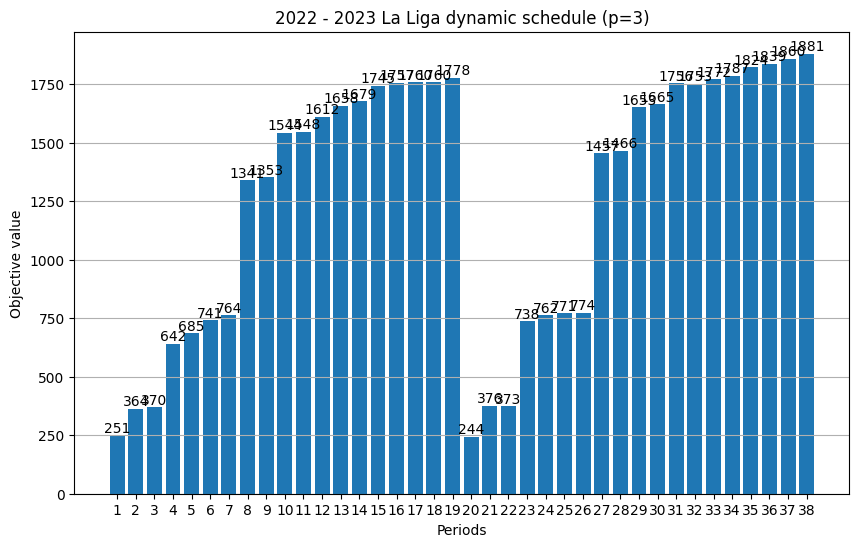

In [4]:
print(objective_values)
obje =  objective_values + objective_values2 

obje = np.array(obje)
print(obje)
print(sum(obje))


plt.figure(figsize=(10,6))
bars = plt.bar(range(len(obje)), obje)
plt.bar_label(bars)
plt.xlabel('Periods')
plt.ylabel('Objective value')
plt.title('2022 - 2023 La Liga dynamic schedule (p=3)')

# Change the x-axis tick labels
new_tick_labels = [i for i in range(1, 39)]  # New tick labels
plt.xticks(range(len(obje)), new_tick_labels)

plt.grid(axis='y')  # Show grid on the y-axis
#plt.ylim(0,100)
plt.show()

[48103.0]


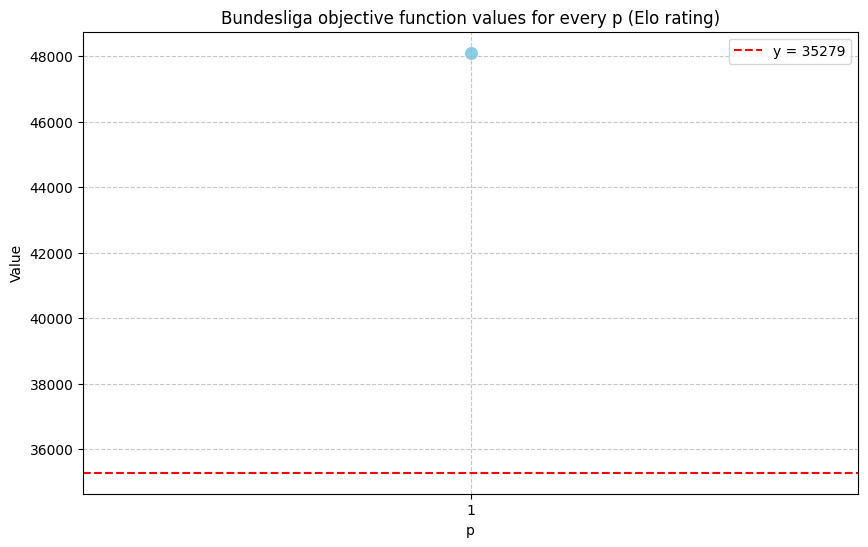

In [5]:
print(big_obj_values)
# Your existing code to create the scatter plot
indices = range(1, len(big_obj_values) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(indices, big_obj_values, color='skyblue', s=70)
plt.title('Bundesliga objective function values for every p (Elo rating)')
plt.xlabel('p')
plt.ylabel('Value')
plt.xticks(indices)  # Set x-axis ticks to match indices
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a straight line at y = 45867 with red color
plt.axhline(y=35279, color='red', linestyle='--', label='y = 35279')

plt.legend()  # Show the legend including the added line
plt.show()
